# Imports and Data

In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

<Axes: >

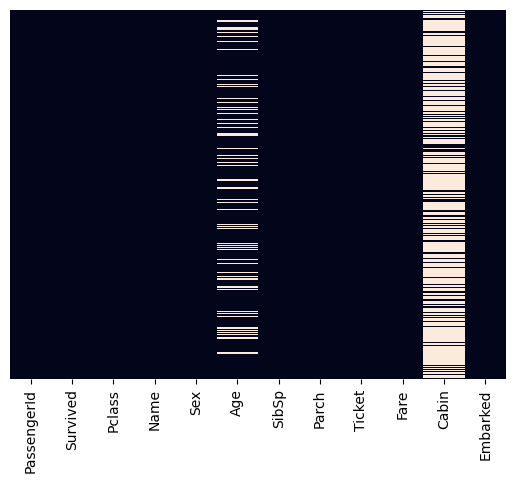

In [76]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False)

Since only a small proportion of 'Age' data is missing, it can be synthetically filled in using some statistical method. Since a large amount of 'Cabin' data is missing, it may not be of much value and hence can be dropped.

<Axes: xlabel='Survived', ylabel='count'>

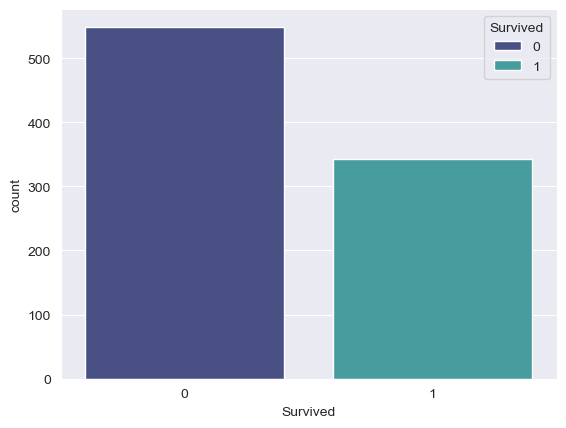

In [79]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', data = data, palette = 'mako', hue = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

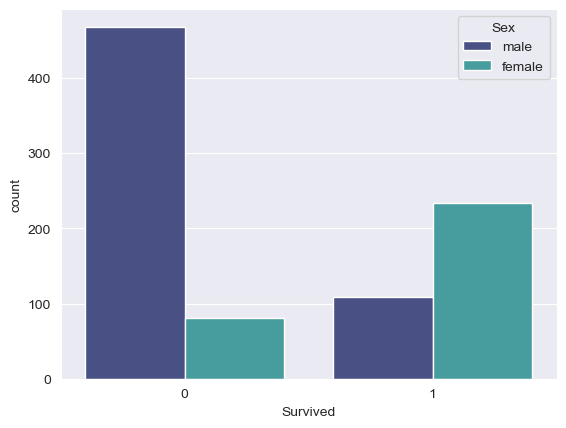

In [80]:
sns.countplot(x = 'Survived', data = data, palette = 'mako', hue = 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

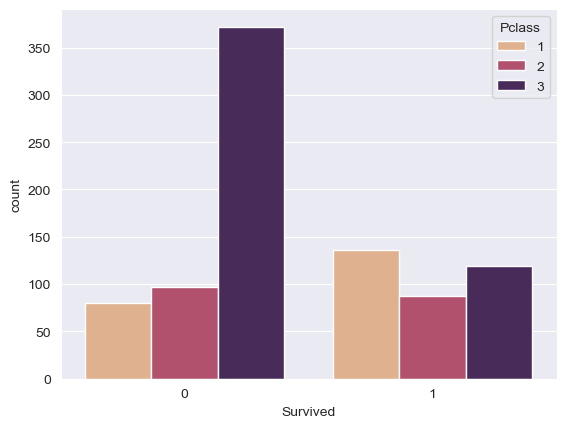

In [82]:
sns.countplot(x = 'Survived', data = data, palette = 'flare', hue = 'Pclass')

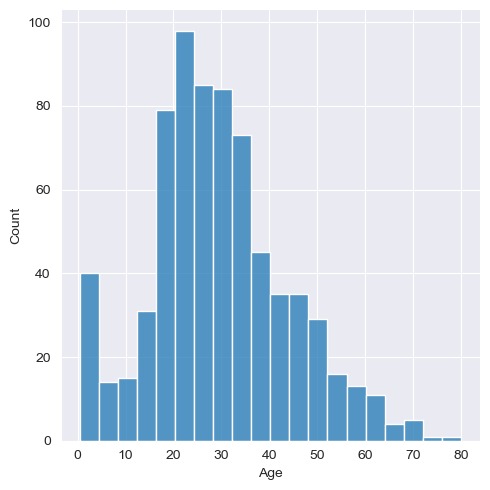

In [84]:
sns.displot(data['Age'].dropna())

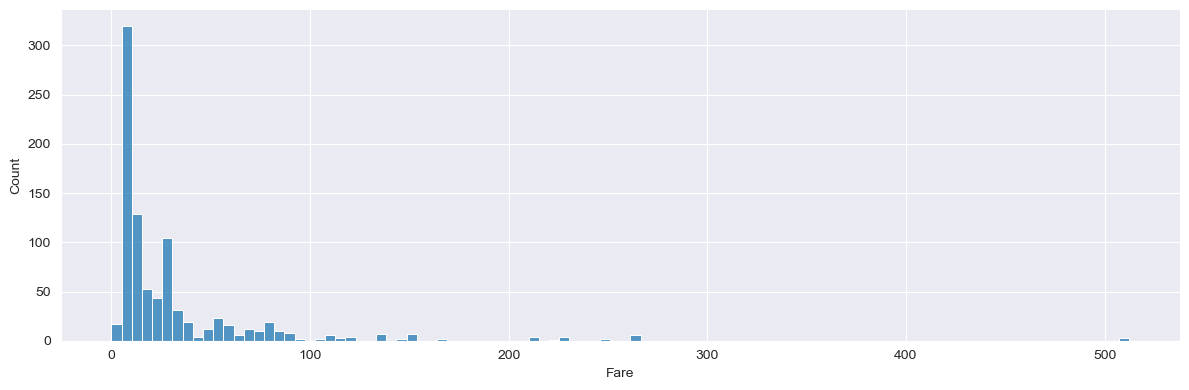

In [86]:
sns.displot(data['Fare'], bins = 100, height = 4, aspect = 3)
plt.show()

# Data Pre-processing


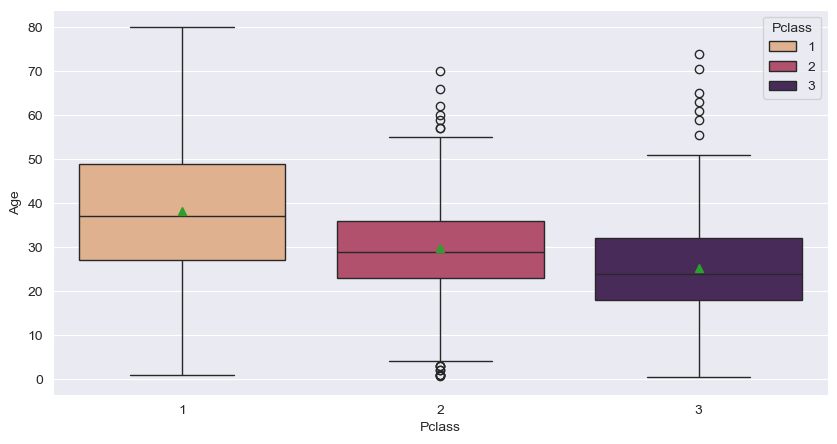

In [89]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = data, palette = 'flare', hue = 'Pclass', showmeans = True)
plt.show()

In [92]:
#impute Age(fill in missing values by reference)
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

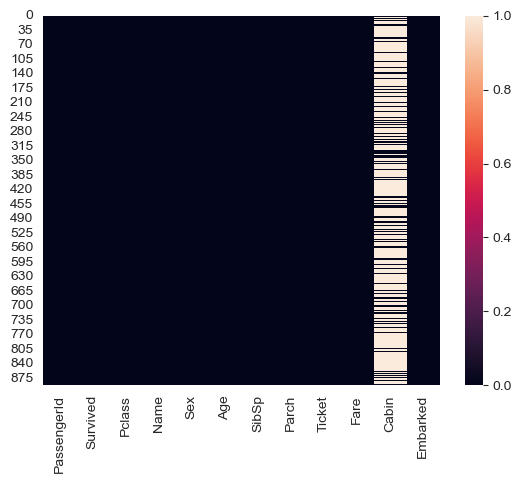

In [94]:
sns.heatmap(data.isnull())

In [96]:
# Drop Cabin
data.drop('Cabin', axis = 1, inplace = True)

<Axes: >

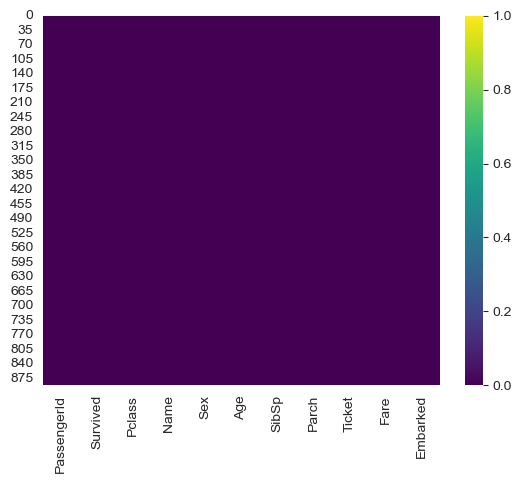

In [98]:
sns.heatmap(data.isnull(), cmap = 'viridis')

In [100]:
#change categorical to dummy var (one hot encoding)
sex = pd.get_dummies(data['Sex'], dtype = int, drop_first=True) #drop_first removes any  redundant column to eliminate multivollinearity

In [102]:
embarked = pd.get_dummies(data['Embarked'], dtype = int, drop_first=True) 

In [104]:
data_encoded = pd.concat([data, sex, embarked], axis = 1)
data_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [106]:
data_encoded.drop(['Sex','Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [108]:
data_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [110]:
data_encoded.drop(['PassengerId'], axis = 1, inplace = True)
data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Model Development


In [123]:
data_encoded['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [125]:
#Data Splitting 
data_encoded.columns
X = data_encoded[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = data_encoded['Survived']



In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [135]:
from sklearn.linear_model import LogisticRegression

Logmodel = LogisticRegression(max_iter=1000)
Logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [139]:
predictions = Logmodel.predict(X_test)

In [141]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [147]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[134  20]
 [ 38  76]]
